# Validación de la Regresion Lineal

## Dividir el dataset en conjunto de entrenamiento y de testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/Acer Nitro 5/Documents/Python Scripts/ML/datasets/ads/Advertising.csv")

In [3]:
a = np.random.randn(len(data))

(array([ 2.,  3.,  4., 36., 36., 50., 27., 30.,  8.,  4.]),
 array([-3.26851174, -2.68353683, -2.09856192, -1.51358702, -0.92861211,
        -0.3436372 ,  0.2413377 ,  0.82631261,  1.41128751,  1.99626242,
         2.58123733]),
 <BarContainer object of 10 artists>)

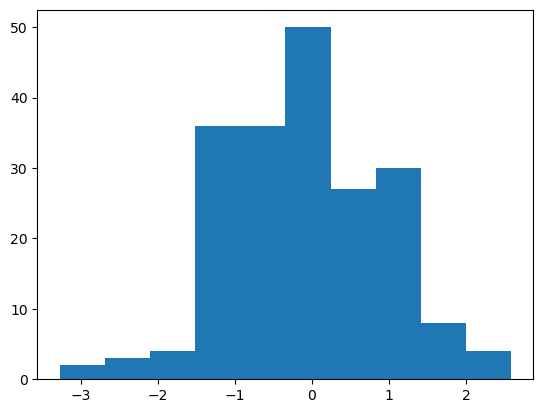

In [4]:
plt.hist(a)

In [5]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [6]:
len(training), len(testing)

(158, 42)

In [7]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [8]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     797.8
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           2.54e-82
Time:                        11:21:08   Log-Likelihood:                -290.32
No. Observations:                 158   AIC:                             586.6
Df Residuals:                     155   BIC:                             595.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1247      0.302     10.338      0.000       2.528       3.722
TV             0.0441      0.001     31.194      0.000       0.041       0.047
Radio          0.1917      0.009     22.438      0.000       0.175       0.209
==============================================================================
Omnibus:                       12.858   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.981
Skew:                          -0.726   Prob(JB):                     0.000921
Kurtosis:                       3.123   Cond. No.                         429.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Validación del modelo con el conjunto de testing

In [9]:
sales_pred = lm.predict(testing)
sales_pred

3      17.727675
5      12.880662
7      12.187096
8       3.906802
10      7.154135
15     20.892134
24      8.289645
26     15.048189
30     21.477952
39     20.414641
43     13.867741
48     16.182086
49      8.320213
53     20.039624
54     20.240667
58     21.936077
69     21.108501
72     10.632335
75     12.246028
79      9.721004
85     15.179533
86     11.763301
87     15.792491
88     11.909705
90      9.992183
107     7.172703
110    14.663709
115    13.147741
121     8.113493
130    10.745130
131    15.387164
132     8.708510
139    19.700347
147    23.251310
151    10.075876
153    18.295054
165    14.127808
167    13.250032
180    10.535761
186     9.685092
194    16.555785
199    15.018470
dtype: float64

In [10]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

196.75831619174775

In [11]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

2.2461266728654543

In [12]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.1634962222883

<Axes: xlabel='TV', ylabel='Sales'>

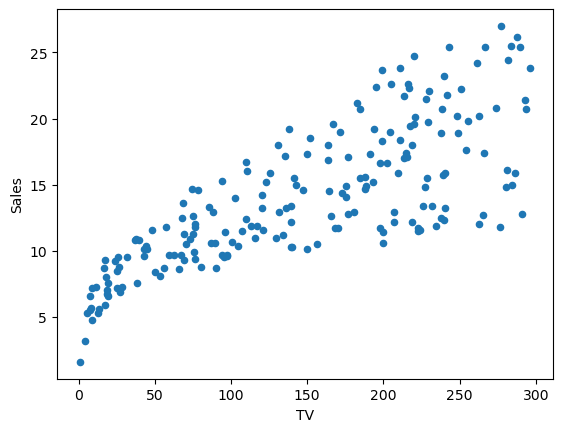

In [14]:
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y ="Sales")

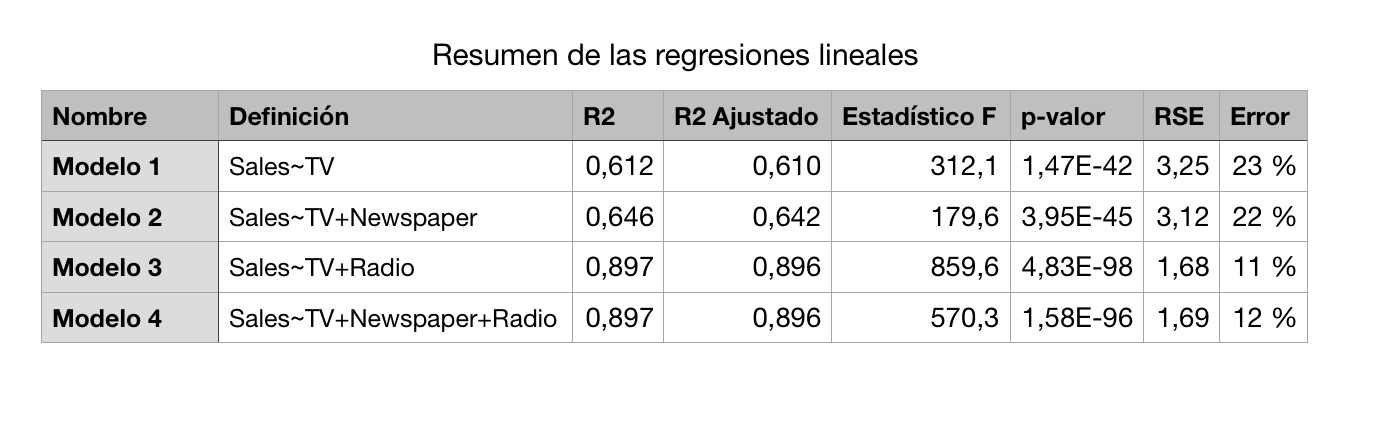

In [15]:
from IPython.display import Image
Image(filename="C:/Users/Acer Nitro 5/Documents/Python Scripts/ML/notebooks/resources/summary-lm.png")